<a href="https://colab.research.google.com/github/ChanWooSong/study_introduce_ml/blob/main/0602.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import


In [ ]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mglearn
import numpy as np
import scipy

import matplotlib.pyplot as plt
import matplotlib
import sklearn
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
#한글 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
matplotlib.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 77 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontcon

# Chapter 7
# 텍스트 데이터 다루기

텍스트 데이터는 주로 글자가 연결된 문자열로 표현된다.


즉, 길이가 서로 같은 경우가 거의 없어 알고리즘 적용 전에 전처리를 해야 한다.

**문자열 데이터 타입**



---


1. **범주형 데이터**
- 고정된 목록으로 구성 (ex. '빨', '주', '노' 중 하나를 택하는 경우 | 드롭다운)

---


2. **범주에 의미를 연결시킬 수 있는 임의의 문자열**
- 1번과 비슷하나 드롭다운 대신 텍스트 필드로 받은 경우 (ex. 빨간색과 붉은색, 같은 의미이지만 표현이 다른 경우 하나로 본다.)
- 다른 것으로 대체할 수 없는 경우 '그 외'로 표시하면 된다.

---


3. **구조화된 문자열 데이터**
- 직접 입력을 받은 경우이나 주소, 이름처럼 일정한 구조를 가진 경우

---


4. **텍스트 데이터**
- 자유로운 형태



---



**정보 검색과 자연어 처리 공동체에서 유래된 용어**

> 데이터셋 : 말뭉치

> 하나의 텍스트를 의미하는 데이터 포인트 : 문서




**영화 리뷰 감성 분석**
--- 
데이터는 IMDb 웹사이트에서 수집한 영화 리뷰 데이터셋


*   7점 이상은 양성, 4점 이하는 음성으로 이진 분류(중간은 포함 X)
*   깃허브에서 데이터를 다운받아서 사용, 또는 주소를 활용해서도 가능



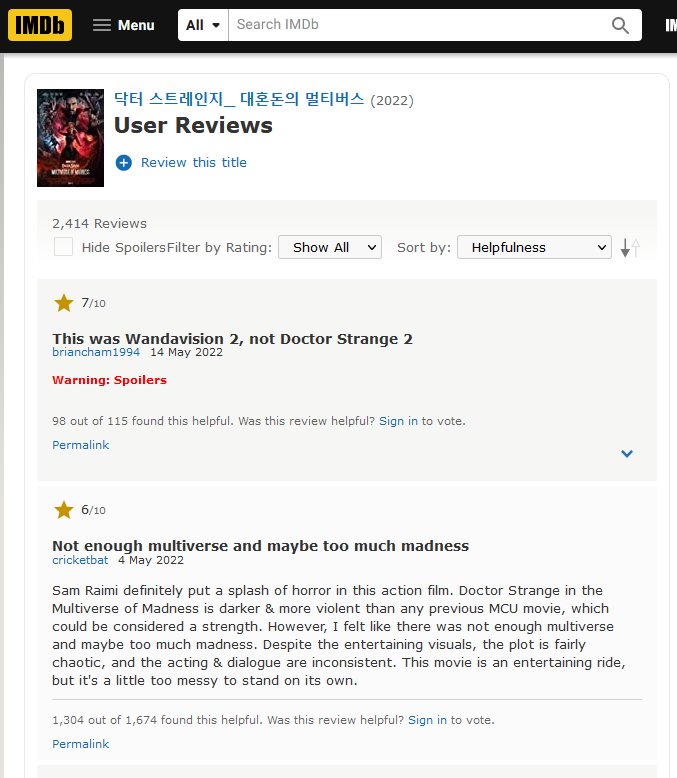

In [ ]:
! wget -nc http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -P data
! tar xzf data/aclImdb_v1.tar.gz --skip-old-files -C data

--2022-05-29 18:29:56--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘data/aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  43.0MB/s    in 1.9s    

2022-05-29 18:29:58 (43.0 MB/s) - ‘data/aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [ ]:
# !tree data/aclImdb
# 코랩에서 tree명령어는 없어서 find를 대신해 사용
!find ./data -type d

./data
./data/aclImdb
./data/aclImdb/test
./data/aclImdb/test/neg
./data/aclImdb/test/pos
./data/aclImdb/train
./data/aclImdb/train/unsup
./data/aclImdb/train/neg
./data/aclImdb/train/pos


In [ ]:
!rm -r data/aclImdb/train/unsup

In [ ]:
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")
# 텍스트와 레이블을 포함하고 있는 Bunch 오브젝트를 반환합니다.
text_train, y_train = reviews_train.data, reviews_train.target
print("text_train의 타입:", type(text_train))
print("text_train의 길이:", len(text_train))
print("text_train[6]:\n", text_train[6])

text_train의 타입: <class 'list'>
text_train의 길이: 25000
text_train[6]:
 b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [ ]:
# <br> 태그는 html에서 엔터와 같은 역할을 한다.
# 즉, 원하는 데이터와 상관없는데 크롤링하면서 가져와지는 태그들은 제거를 하는 것이 좋다.
# 파이썬 3 에서는 바이너리 인코딩인 bytes 타입
# 파이썬 2에서는 문자열
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [ ]:
print("클래스별 샘플 수 (훈련 데이터):", np.bincount(y_train))

클래스별 샘플 수 (훈련 데이터): [12500 12500]


In [ ]:
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("테스트 데이터의 문서 수:", len(text_test))
print("클래스별 샘플 수 (테스트 데이터):", np.bincount(y_test))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

테스트 데이터의 문서 수: 25000
클래스별 샘플 수 (테스트 데이터): [12500 12500]


우리는 리뷰를 가지고 양성인지 음성인지 구분하는 것이 목적(이진 분류)


# **텍스트 데이터를 BOW로 표현하기** (Bag of Words)

장, 문단, 서식 같은 입력 텍스트 구조 대부분을 잃고, 각 단어가 말뭉치에 얼마나 나타나는지만 헤아린다.

**BOW 표현 단계**
1. 토큰화 : 각 문서를 단어로 나눈다.(공백이나 구두점 등을 기준으로)
- 구두점 : . , ? ! 등등
2. 어휘 사전 구축 : 모든 문서에 나타난 단어의 어휘를 모아 번호 매김
3. 인코딩 : 어휘 사전의 단어가 문서마다 몇 번 나타나는가

## **샘플 데이터에 BOW 적용하면서 처리 과정 확인**

In [ ]:
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [ ]:
print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:\n", vect.vocabulary_)
# 숫자는 a~z 순서

어휘 사전의 크기: 13
어휘 사전의 내용:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


BOW 표현을 만들기 위해 transform을 호출

In [ ]:
bag_of_words = vect.transform(bards_words)
print("BOW:", repr(bag_of_words))

BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


BOW 표현은 0이 아닌 값만 저장하는 SciPy 희소 행렬로 저장

2X13 행렬, 각 행은 하나의 데이터 포인트, 각 특성은 각 단어에 대응

0인 원소는 메모리 낭비를 피하기 위해 저장 X > 따라서 0인 것을 도출

In [ ]:
print("BOW의 밀집 표현:\n", bag_of_words.toarray())

BOW의 밀집 표현:
 [[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


위의 0 0 1 1 은 'The fool ...' 아래 1 1 0 1 은 'but the ...' 

## **영화 리뷰에 대한 BOW**

In [ ]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n", repr(X_train))
print(len(text_train))

X_train:
 <25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>
25000


단어 74849, 문장은 25000

In [ ]:
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다. 아직 문제없이 출력되나 아래 메서드가 좀더 이쁘게 정렬됨
# 대신 get_feature_names_out()을 사용합니다.
feature_names = vect.get_feature_names_out()
print("특성 개수:", len(feature_names))
print("처음 20개 특성:\n", feature_names[:20])
print("20010에서 20030까지 특성:\n", feature_names[20010:20030])
print("매 2000번째 특성:\n", feature_names[::2000])

특성 개수: 74849
처음 20개 특성:
 ['00' '000' '0000000000001' '00001' '00015' '000s' '001' '003830' '006'
 '007' '0079' '0080' '0083' '0093638' '00am' '00pm' '00s' '01' '01pm' '02']
20010에서 20030까지 특성:
 ['dratted' 'draub' 'draught' 'draughts' 'draughtswoman' 'draw' 'drawback'
 'drawbacks' 'drawer' 'drawers' 'drawing' 'drawings' 'drawl' 'drawled'
 'drawling' 'drawn' 'draws' 'draza' 'dre' 'drea']
매 2000번째 특성:
 ['00' 'aesir' 'aquarian' 'barking' 'blustering' 'bête' 'chicanery'
 'condensing' 'cunning' 'detox' 'draper' 'enshrined' 'favorit' 'freezer'
 'goldman' 'hasan' 'huitieme' 'intelligible' 'kantrowitz' 'lawful' 'maars'
 'megalunged' 'mostey' 'norrland' 'padilla' 'pincher' 'promisingly'
 'receptionist' 'rivals' 'schnaas' 'shunning' 'sparse' 'subset'
 'temptations' 'treatises' 'unproven' 'walkman' 'xylophonist']


처음 20개중 15개가 숫자형, 영화 리뷰인 것을 고려하여 007은 의미 있을 수 있으나 나머지는 무의미하다고 판단

또한  draught, draughts은 같은 의미이지만 단수와 복수형으로 다른 단어로 들어가는 것은 바람직하지 못하다.


즉, 특성 추출 방법을 개선하는 것이 중요하다고 생각되나 혹시 모르니 개선 전에 성능 수치 확인

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5)
print("크로스 밸리데이션 평균 점수: {:.2f}".format(np.mean(scores)))

크로스 밸리데이션 평균 점수: 0.88


그리드 서치를 통해 조정

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수: ", grid.best_params_)

최상의 크로스 밸리데이션 점수: 0.89
최적의 매개변수:  {'C': 0.1}


In [ ]:
X_test = vect.transform(text_test)
print("테스트 점수: {:.2f}".format(grid.score(X_test, y_test)))

테스트 점수: 0.88


CountVectorizer로 정규표현식을 사용해 토큰 추출

기본적인 정규식 "\b\w\w+\b"



*   \b : 경계
*   \w : 문자나 숫자
*   즉 기본적인 정규식은 문자나 숫자가 적어도 둘 이상 연속된 단어를 찾는 것.
*   CountVectorizer는 모든 대문자를 소문자로 변경
*   의미없는 숫자를 지우기 위해서 적어도 두 개의 문서에 토큰을 사용(min_df 매개변수로 토큰이 나타날 최소 문서 개수를 지정할 수 있다)



In [ ]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("min_df로 제한한 X_train:", repr(X_train))

min_df로 제한한 X_train: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


 74849에서 27271개로 축소

In [ ]:
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
feature_names = vect.get_feature_names_out()

print("First 50 features:\n", feature_names[:50])
print("Features 20010 to 20030:\n", feature_names[20010:20030])
print("Every 700th feature:\n", feature_names[::700])

First 50 features:
 ['00' '000' '007' '00s' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10'
 '100' '1000' '100th' '101' '102' '103' '104' '105' '107' '108' '10s'
 '10th' '11' '110' '112' '116' '117' '11th' '12' '120' '12th' '13' '135'
 '13th' '14' '140' '14th' '15' '150' '15th' '16' '160' '1600' '16mm' '16s'
 '16th']
Features 20010 to 20030:
 ['repentance' 'repercussions' 'repertoire' 'repetition' 'repetitions'
 'repetitious' 'repetitive' 'rephrase' 'replace' 'replaced' 'replacement'
 'replaces' 'replacing' 'replay' 'replayable' 'replayed' 'replaying'
 'replays' 'replete' 'replica']
Every 700th feature:
 ['00' 'affections' 'appropriately' 'barbra' 'blurbs' 'butchered' 'cheese'
 'commitment' 'courts' 'deconstructed' 'disgraceful' 'dvds' 'eschews'
 'fell' 'freezer' 'goriest' 'hauser' 'hungary' 'insinuate' 'juggle'
 'leering' 'maelstrom' 'messiah' 'music' 'occasional' 'parking'
 'pleasantville' 'pronunciation' 'recipient' 'reviews' 'sas' 'shea'
 'sneers' 'steiger' 'swastika' 'thrusting'

특성 개수: 74849
처음 20개 특성:
 ['00' '000' '0000000000001' '00001' '00015' '000s' '001' '003830' '006'
 '007' '0079' '0080' '0083' '0093638' '00am' '00pm' '00s' '01' '01pm' '02']
20010에서 20030까지 특성:
 ['dratted' 'draub' 'draught' 'draughts' 'draughtswoman' 'draw' 'drawback'
 'drawbacks' 'drawer' 'drawers' 'drawing' 'drawings' 'drawl' 'drawled'
 'drawling' 'drawn' 'draws' 'draza' 'dre' 'drea']
매 2000번째 특성:
 ['00' 'aesir' 'aquarian' 'barking' 'blustering' 'bête' 'chicanery'
 'condensing' 'cunning' 'detox' 'draper' 'enshrined' 'favorit' 'freezer'
 'goldman' 'hasan' 'huitieme' 'intelligible' 'kantrowitz' 'lawful' 'maars'
 'megalunged' 'mostey' 'norrland' 'padilla' 'pincher' 'promisingly'
 'receptionist' 'rivals' 'schnaas' 'shunning' 'sparse' 'subset'
 'temptations' 'treatises' 'unproven' 'walkman' 'xylophonist']

위가 원래 결과인데 숫자의 길이도 줄었고 희귀한 단어나 철자가 틀린 단어들도 사라짐

In [ ]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최적의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))

최적의 크로스 밸리데이션 점수: 0.89


원래 9분 걸리던 것이 5분으로 줄었다. 하지만 성능은 그대로

# **불용어**
: 검색 용어로 사용하지 않는 단어
* 불용어 2 가지로 나누기
1. 너무 자주 나타나는 단어를 제외하는 것
2. 사용하는 것

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("불용어 개수:", len(ENGLISH_STOP_WORDS))
print("매 10번째 불용어:\n", list(ENGLISH_STOP_WORDS)[::10])

불용어 개수: 318
매 10번째 불용어:
 ['besides', 'this', 'therefore', 'be', 'whole', 'always', 'us', 'since', 'two', 'six', 'himself', 'if', 'there', 'we', 'thus', 'somewhere', 'sometime', 'become', 'again', 'sometimes', 'show', 'namely', 'many', 'for', 'has', 'that', 'toward', 'last', 'itself', 'into', 'one', 'somehow']


In [ ]:
# stop_words="english"라고 지정하면 내장된 불용어를 사용합니다.
# 내장된 불용어에 추가할 수도 있고 자신만의 목록을 사용할 수도 있습니다.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("불용어가 제거된 X_train:\n", repr(X_train))

불용어가 제거된 X_train:
 <25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


27271에서 26966으로 줄어듬(305개만큼 줄어듬)

In [ ]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))

최상의 크로스 밸리데이션 점수: 0.88


성능이 조금 감소, 하지만 나아진 것이 없어 사용하는 것이 도움 X

---

고정된 불용어 목록은 모델이 데이터셋만 보고 불용어를 골라내기 어려운 작은 데이터셋에서나 도움됨

---
아래는 CountVectorizer의 max_df 옵션을 지정해 자주 나타나는 단어를 제거하는 방법

In [ ]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(CountVectorizer(), LogisticRegression(max_iter=5000))
param_grid = {'countvectorizer__max_df': [100, 1000, 10000, 20000], 'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))
print(grid.best_params_)

최상의 크로스 밸리데이션 점수: 0.89
{'countvectorizer__max_df': 20000, 'logisticregression__C': 0.1}


교차 검증 점수를 보아 성능의 개선은 없어보인다.

In [ ]:
len(grid.best_estimator_.named_steps['countvectorizer'].vocabulary_)

74840

max_df값과 C 값을 조정한 점수표

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


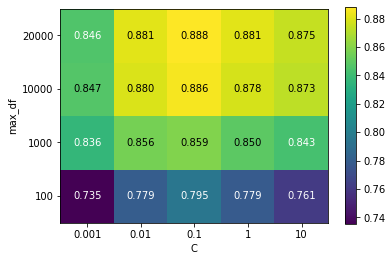

In [ ]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 5)
# 히트맵을 그립니다
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="max_df", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['countvectorizer__max_df'])
plt.colorbar(heatmap)
plt.show() # 책에는 없음

# **tf-idf로 데이터 스케일 변경**


위처럼 특성을 제외하는 방식이 아닌 의미있는 특성인지 계산해 스케일을 조정하는 방식(가장 잘 알려진 tf-idf 사용)

한 단어가 특정 문서에 자주 나타나고 다른 여러 문서에는 아니라면 그 문서를 잘 나타내는 것이라고 생각

TfidVectorizer는 텍스트 데이터를 BOW 특성 추출과 tf-idf 변환 수행

\begin{equation*}
\text{tfidf}(w, d) = \text{tf} \times (\log\big(\frac{N + 1}{N_w + 1}\big) + 1)
\end{equation*}



*   N : 훈련 세트의 문서 개수
*   N_w : w(단어)가 나타난 훈련 세트 문서 개수
*   tf : 단어 빈도수, w가 d에 나타난 횟수
*   d : 대상 문서
---
이후에 정규화를 적용. 즉, 유클리디안 노름이 1이 되도록 스케일 조정
*   유클리디안 노름: x = (a,b) 인 경우
 image.png, 유클리디안 벡터 크기
* 문서의 길이(단어의 수)에 영향을 받지 않기 때문

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))

최상의 크로스 밸리데이션 점수: 0.89


In [ ]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# 훈련 데이터셋을 변환합니다
X_train = vectorizer.transform(text_train)
# 특성별로 가장 큰 값을 찾습니다
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
# 특성 이름을 구합니다
feature_names = np.array(vectorizer.get_feature_names_out())

print("가장 낮은 tfidf를 가진 특성:\n",
      feature_names[sorted_by_tfidf[:20]])

print("가장 높은 tfidf를 가진 특성: \n",
      feature_names[sorted_by_tfidf[-20:]])

가장 낮은 tfidf를 가진 특성:
 ['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
가장 높은 tfidf를 가진 특성: 
 ['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


* 낮은 특성 : 많이 나타나거나, 조금씩 사용되거나, 매우 긴 문서에만 사용
* 높은 특성 : 어떤 쇼나 영화를 나타냄

In [ ]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("가장 낮은 idf를 가진 특성:\n",
       feature_names[sorted_by_idf[:100]])

가장 낮은 idf를 가진 특성:
 ['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


대부분이 불용어

하지만 good great bad 같은 것도 존재해서 중요하지만 tf-idf측면에서는 덜 중요

#### 모델 계수 조사

In [ ]:
grid.best_estimator_.named_steps["logisticregression"].coef_

array([[-0.44134524, -0.48386841, -0.11902462, ...,  0.29075479,
        -0.08855146, -0.36796998]])

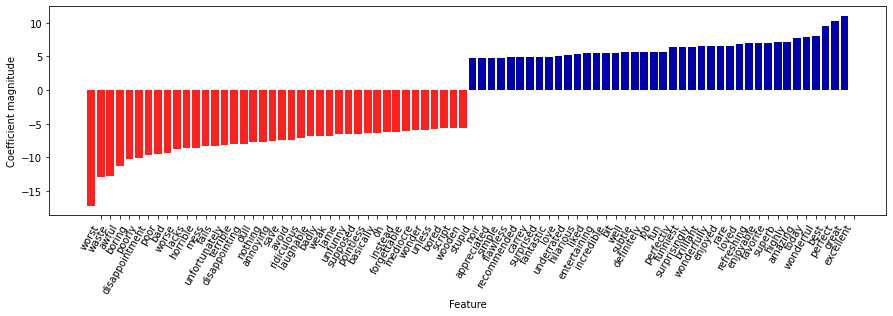

In [ ]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_[0],
    feature_names, n_top_features=40)

* 왼쪽 : 부정적인 리뷰의 단어
* 오른쪽 : 긍정적인 리뷰의 단어

#### 여러 단어로 만든 BOW (n-Grams)

BOW 큰 단점 : 단어의 순서가 완전히 무시된다.

그걸 개선하기 위해 토큰 하나의 횟수만 고려하는 것이 아닌 옆의 두세 개의 토큰도 같이 고려
* 유니그램: 토큰 한 개
* 바이그램: 토큰 두 개
* 트라이그램: 세 개
* n-그램: 일반적으로 연속된 토큰

In [ ]:
print("bards_words:\n", bards_words)

bards_words:
 ['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [ ]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
print("어휘 사전:\n", cv.get_feature_names_out())

어휘 사전 크기: 13
어휘 사전:
 ['be' 'but' 'doth' 'fool' 'he' 'himself' 'is' 'knows' 'man' 'the' 'think'
 'to' 'wise']


In [ ]:
# ngram_range가 바로 주변 토큰 고려, (2,2)이면 두 개가 연속된 바이그램
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
print("어휘 사전:\n", cv.get_feature_names_out())

어휘 사전 크기: 14
어휘 사전:
 ['be fool' 'but the' 'doth think' 'fool doth' 'he is' 'himself to'
 'is wise' 'knows himself' 'man knows' 'the fool' 'the wise' 'think he'
 'to be' 'wise man']


In [ ]:
print("변환된 데이터 (밀집 배열):\n", cv.transform(bards_words).toarray())

변환된 데이터 (밀집 배열):
 [[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


보통 단어 하나가 큰 의미를 가져 최소 길이는 1이다. 하지만 많은 경우 바이그램을 추가하면 도움이 된다.

In [ ]:
#(1,3)은 유니그램, 바이그램, 트라이그램
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
print("어휘 사전:\n", cv.get_feature_names_out())

어휘 사전 크기: 39
어휘 사전:
 ['be' 'be fool' 'but' 'but the' 'but the wise' 'doth' 'doth think'
 'doth think he' 'fool' 'fool doth' 'fool doth think' 'he' 'he is'
 'he is wise' 'himself' 'himself to' 'himself to be' 'is' 'is wise'
 'knows' 'knows himself' 'knows himself to' 'man' 'man knows'
 'man knows himself' 'the' 'the fool' 'the fool doth' 'the wise'
 'the wise man' 'think' 'think he' 'think he is' 'to' 'to be' 'to be fool'
 'wise' 'wise man' 'wise man knows']


In [ ]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
# 매개변수 조합이 많고 트라이그램이 포함되어 있기 때문에
# 그리드 서치 실행에 시간이 오래 걸립니다
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수:\n", grid.best_params_)

최상의 크로스 밸리데이션 점수: 0.91
최적의 매개변수:
 {'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


0.89에서 0.91으로 성능 향상

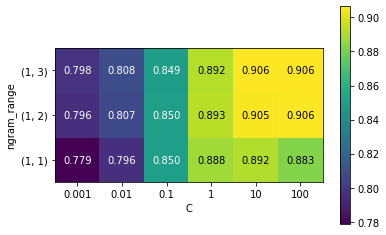

In [ ]:
# 그리드 서치에서 테스트 점수를 추출합니다
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# 히트맵을 그립니다
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

바이그램이 추가되면서 성능이 크게 향상됐고 트라이그램은 조금만 향상

(-22.0, 22.0)

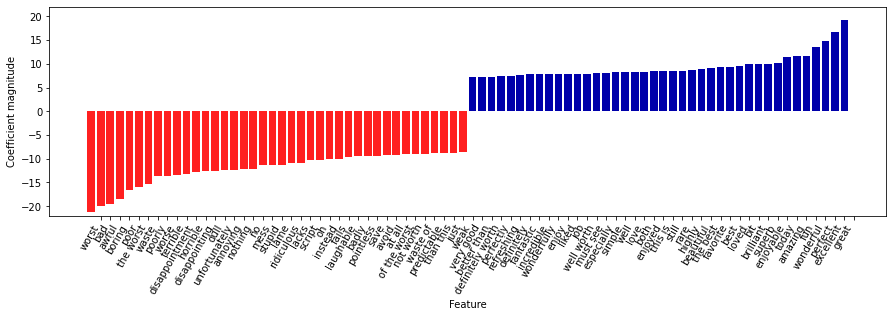

In [ ]:
# 특성 이름과 계수를 추출합니다
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
feature_names = np.array(vect.get_feature_names_out())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef[0], feature_names, n_top_features=40)
plt.ylim(-22, 22)

유의깊게 볼 점 : not worth는 부정적이나 well worth는 긍정적

(-22.0, 22.0)

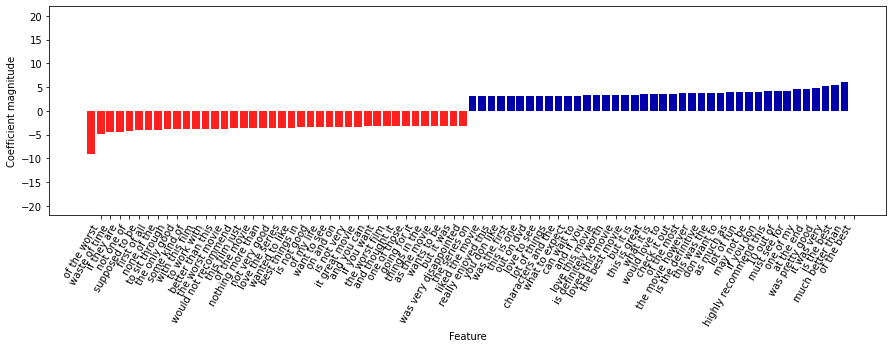

In [ ]:
# 트라이그램 특성을 찾습니다
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# 트라이그램 특성만 그래프로 나타냅니다
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                     feature_names[mask], n_top_features=40)
plt.ylim(-22, 22)

#### 고급 토큰화, 어간 추출, 표제어 추출

drawback, drawbacks 처럼 의미가 같은 경우 어간을 추출해 구분

* 표제어 추출 : 단어의 형태사전을 사용하고 문장에서 단어의 역할을 고려하는 처리 방식
*  표제어 추출과 어간 추출은 단어의 일반 형태를 추출하는 정규화의 한 형태
* 맞춤법 교정도 정규화의 일종


In [ ]:
#!python -m spacy download en

포터 어간 추출기(nltk)와 표제어 추출 방식(spacy) 비교

In [ ]:
import spacy
import nltk

# spacy의 영어 모델을 로드합니다
en_nlp = spacy.load('en_core_web_sm')
# nltk의 PorterStemmer 객체를 만듭니다
stemmer = nltk.stem.PorterStemmer()

# spacy의 표제어 추출과 nltk의 어간 추출을 비교하는 함수입니다
def compare_normalization(doc):
    # spacy로 문서를 토큰화합니다
    doc_spacy = en_nlp(doc)
    # spacy로 찾은 표제어를 출력합니다
    print("표제어:")
    print([token.lemma_ for token in doc_spacy])
    # PorterStemmer로 찾은 토큰을 출력합니다
    print("어간:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [ ]:
compare_normalization(u"Our meeting today was worse than yesterday, "
                       "I'm scared of meeting the clients tomorrow.")

표제어:
['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', '-PRON-', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
어간:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


표제어는 정상적이나 어간에서는 was를 wa로 worse를 wors로 추출
* meeting의 경우 표제어는 처음은 명사로 두 번째는 동사로 인식했으나 어간은 둘 다 동사로 인식

In [ ]:
# 요구사항: spacy에서 표제어 추출 기능과 CountVectorizer의 토큰 분할기를 사용합니다.

# spacy의 언어 모델을 로드합니다
en_nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# spacy 문서 처리 파이프라인을 사용해 자작 토큰 분할기를 만듭니다
# (우리만의 토큰 분할기를 사용합니다)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

# 자작 토큰 분할기를 사용해 CountVectorizer 객체를 만듭니다
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

In [ ]:
# 표제어 추출이 가능한 CountVectorizer 객체로 text_train을 변환합니다
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape:", X_train_lemma.shape)

# 비교를 위해 표준 CountVectorizer를 사용합니다
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape:", X_train.shape)

X_train_lemma.shape: (25000, 22040)
X_train.shape: (25000, 27271)


27271에서 22040개로 줄었다.

In [ ]:
# 훈련 세트의 1%만 사용해서 그리드 서치를 만듭니다
from sklearn.model_selection import StratifiedShuffleSplit

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99,
                            train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=cv)
# 기본 CountVectorizer로 그리드 서치를 수행합니다
grid.fit(X_train, y_train)
print("최상의 크로스 밸리데이션 점수 "
      "(기본 CountVectorizer): {:.3f}".format(grid.best_score_))
# 표제어를 사용해서 그리드 서치를 수행합니다
grid.fit(X_train_lemma, y_train)
print("최상의 크로스 밸리데이션 점수 "
      "(표제어): {:.3f}".format(grid.best_score_))

최상의 크로스 밸리데이션 점수 (기본 CountVectorizer): 0.719
최상의 크로스 밸리데이션 점수 (표제어): 0.720


아주 조금 높지만 표제어와 어간 추출은 모델을 간단하거나 더 낫게 만들어주므로 마지막까지 성능을 쥐어 짜낼때 사용하면 좋다.

# 한국어판 부록
## KoNLPy를 사용한 영화 리뷰 분석

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# delimiter는 구분자로 끊어주는 역할
# keep_default_na는 빈 문자열을 nan형식이 아닌 그대로 나오도록
df_train = pd.read_csv('/content/drive/MyDrive/ratings_train.txt', delimiter='\t', keep_default_na=False)

df_train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
# 책에는 as_matrix()로 써있으나 더이상 사용되지 않는 메서드, values를 대신 사용해야함
text_train = df_train['document'].values
y_train = df_train['label'].values

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/ratings_test.txt', delimiter='\t', keep_default_na=False)

text_test = df_train['document'].values
y_test = df_train['label'].values

In [ ]:
len(text_train), np.bincount(y_train)

(150000, array([75173, 74827]))

In [ ]:
len(text_test), np.bincount(y_test)

(150000, array([75173, 74827]))

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 48.1 MB/s 


In [ ]:
from konlpy.tag import Twitter

twitter_tag = Twitter()

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [ ]:
def twitter_tokenizer(text):
  return twitter_tag.morphs(text)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
twit_param_grid = {'tfidfvectorizer__min_df': [3, 5, 7],
                   'tfidfvectorizer__ngram_range': [(1,1), (1,2), (1,3)],
                   'logisticregression__C':[0.1, 1, 10]}
twit_pipe = make_pipeline(TfidfVectorizer(tokenizer=twitter_tokenizer),
                          LogisticRegression())
twit_grid = GridSearchCV(twit_pipe, twit_param_grid)

twit_grid.fit(text_train[0:1000], y_train[0:1000])
print("최상의 교차 검증 점수 : {:.3f}".format(twit_grid.best_score_))
print("최상의 교차 검증 매개변수 : ", twit_grid.best_params_)

최상의 교차 검증 점수 : 0.718
최상의 교차 검증 매개변수 :  {'logisticregression__C': 1, 'tfidfvectorizer__min_df': 3, 'tfidfvectorizer__ngram_range': (1, 3)}


In [ ]:
X_test_konlpy = twit_grid.best_estimator_.named_steps["tfidfvectorizer"].\
transform(text_test)
score = twit_grid.best_estimator_.named_steps["logisticregression"].score(
    X_test_konlpy, y_test)
print("테스트 세트 점수 : {:.3f}".format(score))

테스트 세트 점수 : 0.712


In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency t

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()
def mecab_tokenizer(text):
  return mecab.morphs(text)

In [ ]:
mecab_param_grid = {'tfidfvectorizer__min_df': [3, 5, 7],
                   'tfidfvectorizer__ngram_range': [(1,1), (1,2), (1,3)],
                   'logisticregression__C':[0.1, 1, 10, 100]}
mecab_pipe = make_pipeline(TfidfVectorizer(tokenizer=mecab_tokenizer),
                          LogisticRegression())
mecab_grid = GridSearchCV(mecab_pipe, mecab_param_grid, n_jobs=-1)

mecab_grid.fit(text_train, y_train)
print("최상의 교차 검증 점수 : {:.3f}".format(mecab_grid.best_score_))
print("최상의 교차 검증 매개변수 : ", mecab_grid.best_params_)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


최상의 교차 검증 점수 : 0.873
최상의 교차 검증 매개변수 :  {'logisticregression__C': 10, 'tfidfvectorizer__min_df': 3, 'tfidfvectorizer__ngram_range': (1, 3)}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


실행 1시간 넘게 걸림...

In [ ]:
X_test_mecab = mecab_grid.best_estimator_.named_steps["tfidfvectorizer"].\
transform(text_test)
score = mecab_grid.best_estimator_.named_steps["logisticregression"].score(
    X_test_mecab, y_test)
print("테스트 세트 점수 : {:.3f}".format(score))

테스트 세트 점수 : 0.979


### 토픽 모델링과 문서 군집화
#### LDA

* 토픽 모델링 : 비지도 학습으로 문서를 하나 또는 그 이상의 토픽으로 할당하는 작업
* LDA(잠재 디리클레 할당): 함께 자주 나타나는 단어의 그룹을 찾는것, 각 문서에 토픽의 일부가 혼합되어 있다고 간주


In [ ]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

15% 문서에서 나타나는 단어를 삭제 후 가장 많이 등장하는 단어 10000개에 대한 BOW 모델 생성

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)
# 모델 생성과 변환을 한 번에 합니다
# 변환 시간이 좀 걸리므로 시간을 절약하기 위해 동시에 처리합니다
document_topics = lda.fit_transform(X)

* n_components : 토픽의 수
* learning_method : online(기존), batch(느리지만 더 나음)
* max_iter : 기본값 0, 성능 향상을 위해 25로 설정


In [ ]:
print("lda.components_.shape:", lda.components_.shape)

lda.components_.shape: (10, 10000)


10개의 토픽, 10000개의 단어

In [ ]:
# 토픽마다(components_의 행) 특성을 오름차순으로 정렬합니다
# 내림차순이 되도록 [:, ::-1] 사용해 행의 정렬을 반대로 바꿉니다
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
# CountVectorizer 객체에서 특성 이름을 구합니다.
feature_names = np.array(vect.get_feature_names_out())

In [ ]:
# 10개의 토픽을 출력합니다
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         worst         series        saw           
family        us            comedy        episode       am            
real          our           thing         tv            thought       
performance   american      guy           episodes      years         
beautiful     documentary   re            shows         book          
work          history       stupid        season        watched       
each          new           actually      new           now           
both          own           nothing       television    dvd           
director      point         want          years         got           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

topic 
* 1 : 역사와 전쟁 관련
* 2 : 코미디물
* 3 : TV 시리즈
* 4 : 일반적인 단어
* 5 : 어린이 영화
* 8 : 영화제
---
(개인적인 생각) 
* 7 : 배우, 감독, 연출 평가 단어
* 9 : 공포, 호러 장르


In [ ]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [ ]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])

In [ ]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
thriller      worst         german        car           beautiful     
suspense      awful         hitler        gets          young         
horror        boring        nazi          guy           old           
atmosphere    horrible      midnight      around        romantic      
mystery       stupid        joe           down          between       
house         thing         germany       kill          romance       
director      terrible      years         goes          wonderful     
quite         script        history       killed        heart         
bit           nothing       new           going         feel          
de            worse         modesty       house         year          
performances  waste         cowboy        away          each          
dark          pretty        jewish        head          french        
twist 

* 7 : 공포 스릴러
* 16, 54 : 부정적인 리뷰
* 63 : 코미디에 대한 긍정적 리뷰
* 45 : 음악 관련
45를 통해 리뷰를 확인

In [ ]:
# 음악적인 토픽 45를 가중치로 정렬합니다
music = np.argsort(document_topics100[:, 45])[::-1]
# 이 토픽이 가장 비중이 큰 문서 다섯개를 출력합니다
for i in music[:10]:
    # 첫 두 문장을 출력합니다
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'I love this movie and never get tired of watching. The music in it is great.\n'
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It doesn't matter that H

1. 나는 이 영화를 좋아하고 봐도 질리지 않는다. 그 안에 있는 음악은 훌륭해요.
2. "나는 내가 몇 년 동안 본 어떤 영화보다 스틸 크레이지를 더 즐겼다. 70년대의 한 성공적인 밴드는 다시 한번 시도하기로 결심한다."
3. 할리우드 호텔은 버스비 버클리 감독이 워너 브라더스를 위해 연출한 마지막 영화 뮤지컬이다. 그의 연출 스타일은 바뀌거나 진화하여 이 영화에는 그의 특유의 오버헤드 샷이나 수천 개의 엑스트라가 포함된 거대한 제작 번호가 포함되지 않았다.'
4. "1990년대 후반에 록앤롤 스타들을 휩쓸게 된 것은 어떻게 되는가? 그들은 컴백 투어를 시작한다. 적어도 그것은 70년대 스타디움 록 그룹인 Strange Fruit의 멤버들이 하는 일이다."
5. '지난 3~4년 동안 왕자의 열렬한 팬이었던 내가 "Purple Rain"을 볼 시간이 있다는 것이 정말 믿기지 않는다. 새로 나온 2디스크 기념 스페셜 에디션 때문에 구매하게 되었습니다.'
6. "이 영화는 존 레논에 대한 재러드 해리스의 뛰어난 묘사로 단독으로 볼 가치가 있다. 해리스가 레논을 꼭 닮지 않았다는 것은 중요하지 않다; 그의 매너리즘, 표정, 자세, 억양, 태도는 순수한 레논이다."
7. "펑키하지만 엄밀하게는 2류 영국 글램 록 밴드 스트레인지 프루트는 70년대 야생의 '약하지 않은' 과잉에 시달린 끝에 해체된다. 밴드 멤버들은 각자 각자의 길을 가며 지루하고 별일 없는 90년대에 무미건조한 중년기에 불편하게 정착한다: 우울한 키보디스트 스티븐 리아는 무일푼이 되고 그의 운에 기대어 허영심이 많고 신경질적인 리드 싱어 빌 나이히는 허우적거리는 솔로 가수이자 편집증적인 드러머 티모시 스팔레시에게 도전한다.그는 무거운 세금 빚을 갚지 않기 위해 외딴 농장에서 무명 생활을 하고 있으며, 서투른 베이스 연주자 지미 네일은 생계를 위해 지붕을 설치한다."
8. "아니타 루스의 작품에 관한 책을 막 다 읽었는데, 맥도날드의 TCM 매거진에 실린 천사 복장을 한 사진이 멋있어 보여서 이 영화를 봐야겠다고 생각했다. 나는 그 영화에 대해 들어본 적이 없어서 그것에 대한 선입견이 전혀 없었다."
9. '난 이 영화가 좋아!!! 퍼플 비는 내가 태어난 해에 나왔고 그것은 내가 기억할 수 있을 때부터 내 마음을 가지고 있었다. 이 영화에서 프린스는 너무 빡빡해요.'
10. "이 영화는 캐리가 헤비메탈을 만나는 일종의 영화이다. 그것은 많은 괴롭힘을 당하고 헤비메탈 유령의 도움으로 완전히 복수를 하는 고등학교 남자에 관한 것이다."

토픽을 조사하는 다른 방법 : 각 토픽의 가중치가 얼마인지 document_topics 값을 합해 보는 것

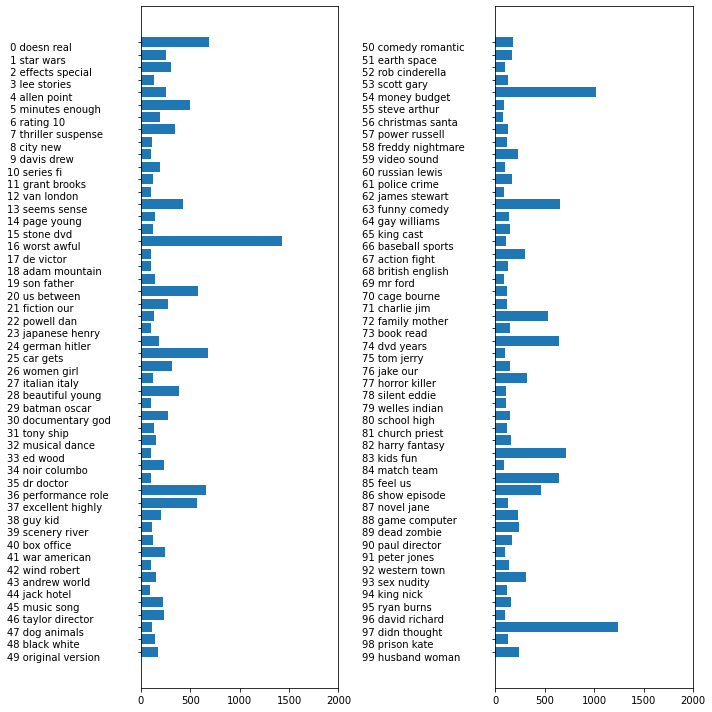

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
# 두 개의 열이 있는 막대 그래프
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

* 97번은 거의 불용어이자 부정적
* 16번은 부정적
* 36, 37번은 긍정적(칭찬)

LDA와 같은 토픽 모델은 레이블이 없거나 있더라도 큰 규모의 텍스트 말뭉치를 해석하는데 좋은 방법. 

LDA는 확률적 알고리즘이므로 random_state에 결과가 많이 변한다. 
따라서 각 토픽의 해당하는 문서를 직접 보고 직관을 검증하는 것이 좋다.





# 요약 및 정리

스팸, 부정거래 탐지, 감성 분석 같은 텍스트 분류 작업에서 BOW 표현은 간단하고 강력한 해법입니다.


**추천 이론서**
* 'Natural Language Processing with Python'(오라일리, 2009)
* 'Introduction to Information Retrieval'(케임브리지 대학, 2008)
온라인에서 무료로 읽을 수 있음

고수준의 텍스트 처리
* spacy : 비교적 최근에 나옴, 효율적
* nltk : 매우 잘 구축, 기능 풍부, 하지만 오래된 라이브러리
* gensim : 토픽 모델링이 강점

텍스트 처리에 순환신경망을 적용하는 것(요즘 성장중, RNN),
word2vec